# Ewaluacja

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from gensim.utils import tokenize

sns.set_style('whitegrid')

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_excel('Ewaluacja.xlsx', header=0, names=['dayID', 'date', 'title'])
df.head()

,dayID,date,title
0,1,2018-12-20,Roraty
1,1,2018-12-20,Archanioł Boży Gabriel
2,1,2018-12-20,Oto Pan Bóg przyjdzie
3,1,2018-12-20,Chleb niebiański
4,1,2018-12-20,Dzielmy się wiarą jak chlebem


## Title tokenization & cleaning

In [3]:
df['title_tokenized'] = df['title'].apply(lambda x: list(tokenize(x, to_lower=True)))
df['title_cleaned'] = df['title_tokenized'].apply(lambda x: " ".join([z.lower() for z in x if z.isalpha()]))
df.head()

,dayID,date,title,title_tokenized,title_cleaned
0,1,2018-12-20,Roraty,[roraty],roraty
1,1,2018-12-20,Archanioł Boży Gabriel,"[archanioł, boży, gabriel]",archanioł boży gabriel
2,1,2018-12-20,Oto Pan Bóg przyjdzie,"[oto, pan, bóg, przyjdzie]",oto pan bóg przyjdzie
3,1,2018-12-20,Chleb niebiański,"[chleb, niebiański]",chleb niebiański
4,1,2018-12-20,Dzielmy się wiarą jak chlebem,"[dzielmy, się, wiarą, jak, chlebem]",dzielmy się wiarą jak chlebem


In [4]:
df.shape

(494, 5)

In [5]:
df['date'] = df['date'].dt.date
#.astype('datetime64[D]')
df.head()

,dayID,date,title,title_tokenized,title_cleaned
0,1,2018-12-20,Roraty,[roraty],roraty
1,1,2018-12-20,Archanioł Boży Gabriel,"[archanioł, boży, gabriel]",archanioł boży gabriel
2,1,2018-12-20,Oto Pan Bóg przyjdzie,"[oto, pan, bóg, przyjdzie]",oto pan bóg przyjdzie
3,1,2018-12-20,Chleb niebiański,"[chleb, niebiański]",chleb niebiański
4,1,2018-12-20,Dzielmy się wiarą jak chlebem,"[dzielmy, się, wiarą, jak, chlebem]",dzielmy się wiarą jak chlebem


In [6]:
df.head()

,dayID,date,title,title_tokenized,title_cleaned
0,1,2018-12-20,Roraty,[roraty],roraty
1,1,2018-12-20,Archanioł Boży Gabriel,"[archanioł, boży, gabriel]",archanioł boży gabriel
2,1,2018-12-20,Oto Pan Bóg przyjdzie,"[oto, pan, bóg, przyjdzie]",oto pan bóg przyjdzie
3,1,2018-12-20,Chleb niebiański,"[chleb, niebiański]",chleb niebiański
4,1,2018-12-20,Dzielmy się wiarą jak chlebem,"[dzielmy, się, wiarą, jak, chlebem]",dzielmy się wiarą jak chlebem


In [7]:
df.to_csv('ewaluacja_cleaned.csv', header=True, index=False)

In [8]:
songs = df['title_cleaned'].unique()
dates = df['date'].unique()
songs.sort()
dates.sort()

In [9]:
dff = pd.DataFrame(index=songs, columns = dates)
print(dff.shape)
dff.head()

(279, 87)


,2018-12-02,2018-12-03,2018-12-04,2018-12-06,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-16,...,2019-05-05,2019-05-06,2019-05-07,2019-05-09,2019-05-12,2019-05-14,2019-05-16,2019-05-19,2019-05-20,2019-05-21
ach ubogi żłobie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alleluja niech zabrzmi panu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
archanioł boży gabriel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aż sponad mórz i szczytów gór,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bliskie jest królestwo boże,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# for i in range(len(songs)):
#     for j in range(len(dates)):
#             dff.iloc[i,j] = 0

In [16]:
# dff.head()

In [13]:
# for k in range(len(df)):
#     for i in range(len(songs)):
#         for j in range(len(dates)):
#             if (df['date'][k] == dates[j]) & (df['title_cleaned'][k] == songs[i]):
#                 dff.iloc[i,j] = 1

# dff.head()

In [14]:
#dff.to_csv('ewaluacja.csv', columns=dff.columns, index=True)

In [3]:
dff = pd.read_csv('ewaluacja.csv', header=0, index_col=0)
dff.tail()

,2018-12-02,2018-12-03,2018-12-04,2018-12-06,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-16,...,2019-05-05,2019-05-06,2019-05-07,2019-05-09,2019-05-12,2019-05-14,2019-05-16,2019-05-19,2019-05-20,2019-05-21
święte imię jezus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
święty nadchodzi święty,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
święty pan bóg i król,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
święty x,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
święty x pan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dff.head()

,2018-12-02,2018-12-03,2018-12-04,2018-12-06,2018-12-09,2018-12-10,2018-12-11,2018-12-12,2018-12-13,2018-12-16,...,2019-05-05,2019-05-06,2019-05-07,2019-05-09,2019-05-12,2019-05-14,2019-05-16,2019-05-19,2019-05-20,2019-05-21
ach ubogi żłobie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alleluja niech zabrzmi panu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
archanioł boży gabriel,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
aż sponad mórz i szczytów gór,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bliskie jest królestwo boże,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dff.shape

(279, 87)

In [18]:
x = df.groupby('title_cleaned').date.nunique()

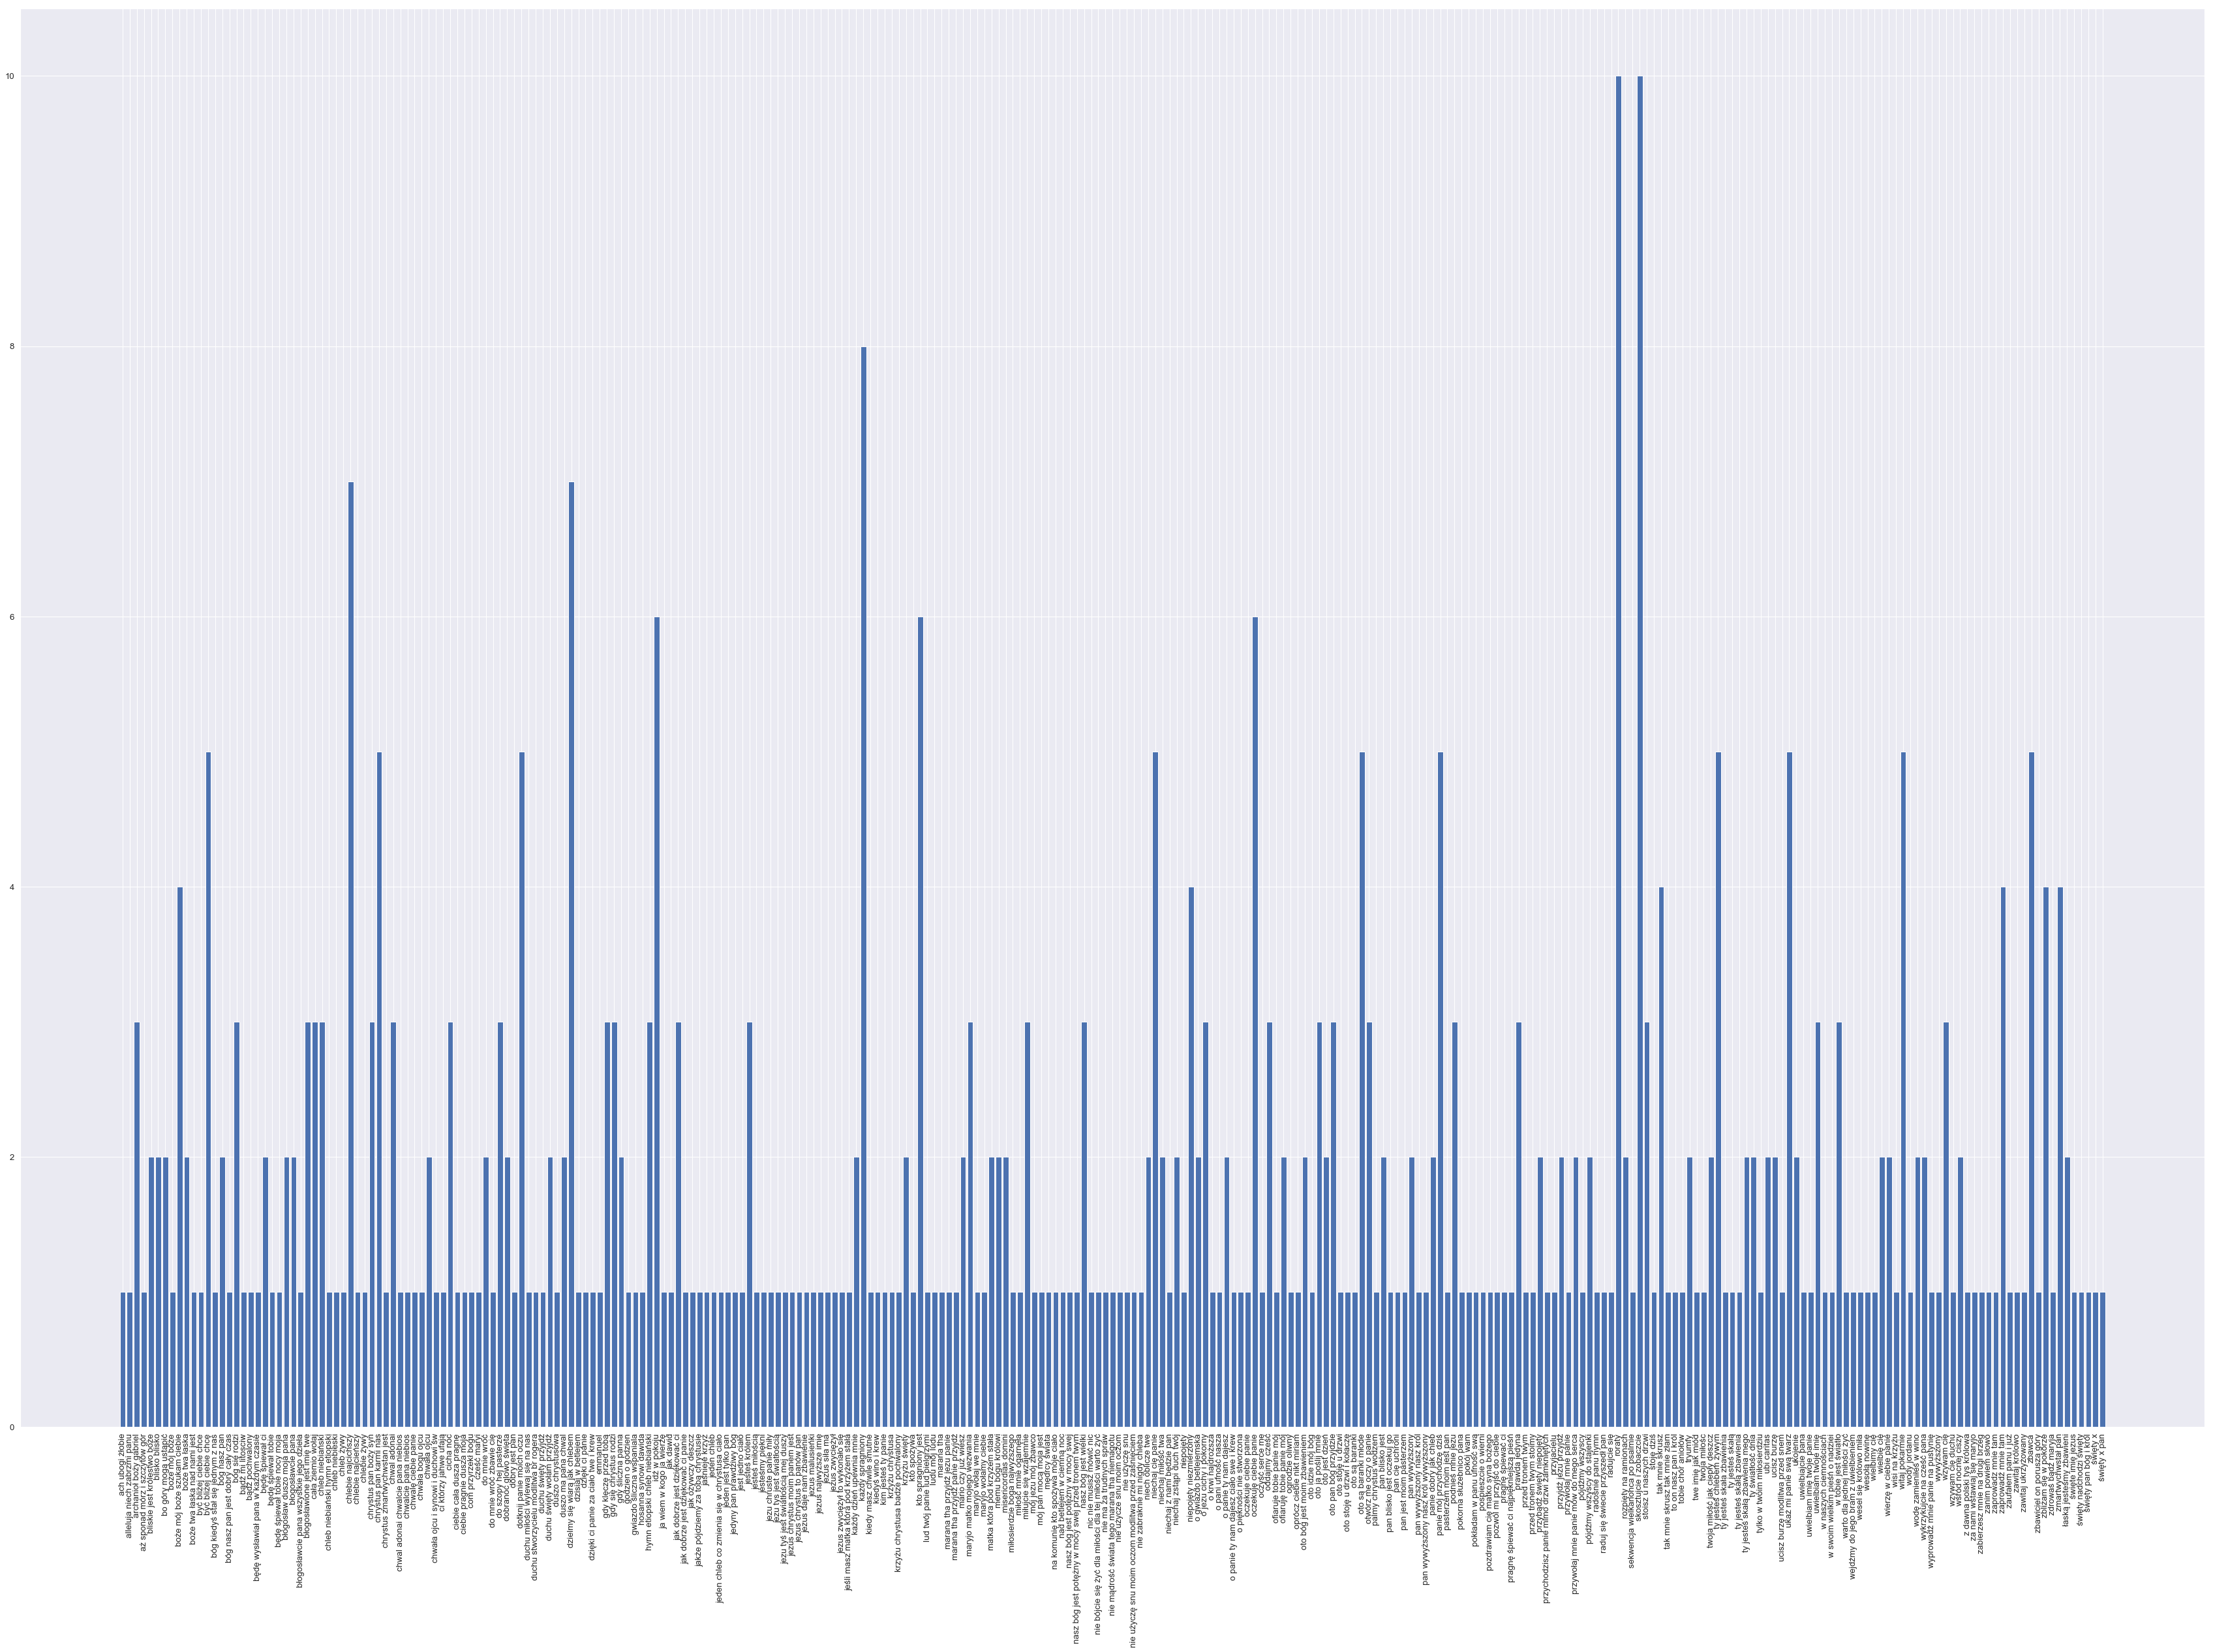

In [30]:
plt.figure(figsize=(60,40))
sns.set(font_scale=1.2)
plt.bar(songs, x, #align='edge')
       )
plt.xticks(rotation=90) 
plt.savefig('prezentacja_songs.jpg')
plt.show()

In [15]:
fig, ax = plt.subplots( nrows=1, ncols=1 , figsize=(200,350)) 
ax.set_title('Liczność piosenek w zbiorze ewaluacyjnym')
ax.barh(songs, x)
fig.savefig('songs_a4.jpg')   
plt.close(fig) 

In [16]:
print(len(songs))
print(len(dates))

279
87


In [33]:
t = np.transpose(dff.values)

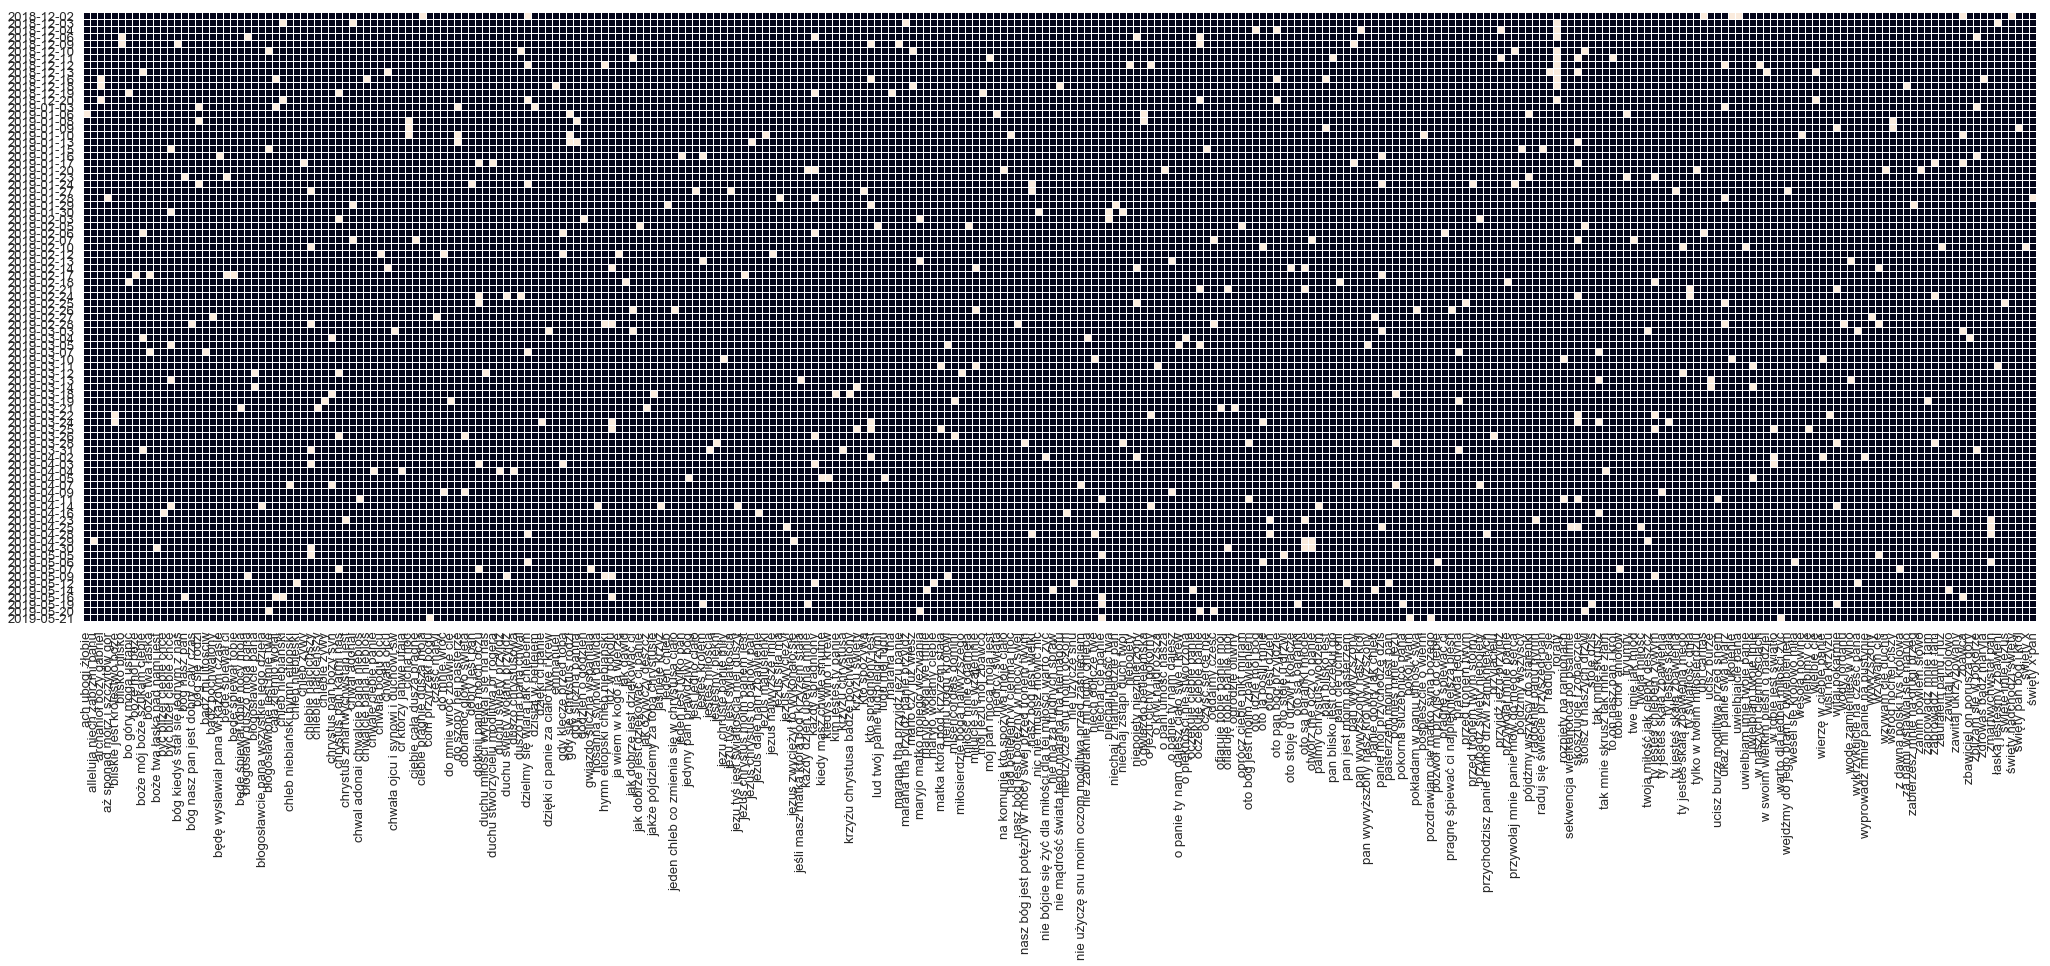

In [39]:
fig = plt.figure(figsize=(35,20))
#sns.set(font_scale=1)
sns.heatmap(t, cbar=False, annot=False, #xticklabels= titles, 
            yticklabels = dates, 
            xticklabels= songs,
            square=True,
           linewidths=.01
           )
plt.xticks(rotation=90) 
plt.show()

In [40]:
fig.savefig("prezentacja_wawrzyny_lines.jpg")

In [41]:
dff['2018-12-02']

KeyError: '2018-12-02'